<a href="https://colab.research.google.com/github/tonpiplaifa/KKU_data_mining/blob/master/Divorce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
divorce_1 = os.path.join(path,'divorce_1.csv')

In [ ]:
divorce_1 = pd.read_csv(divorce_1)
divorce_1

In [ ]:
divorce_1.shape

In [ ]:
divorce_1.isnull().any()

In [ ]:
divorce_1[['couple_div']] = divorce_1[['couple_div']].fillna(0) 

In [ ]:
divorce_1.isnull().any()

จังหวัด     False
avg_debt    False
cluster     False
dtype: bool

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Xd = divorce_1[['couple_div']] #Xd คือตัวแปรของการหย่า

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
Xd,y=make_blobs(n_samples=231, centers=3, n_features=2, random_state=6)

In [ ]:
Xd.shape 

(231, 2)

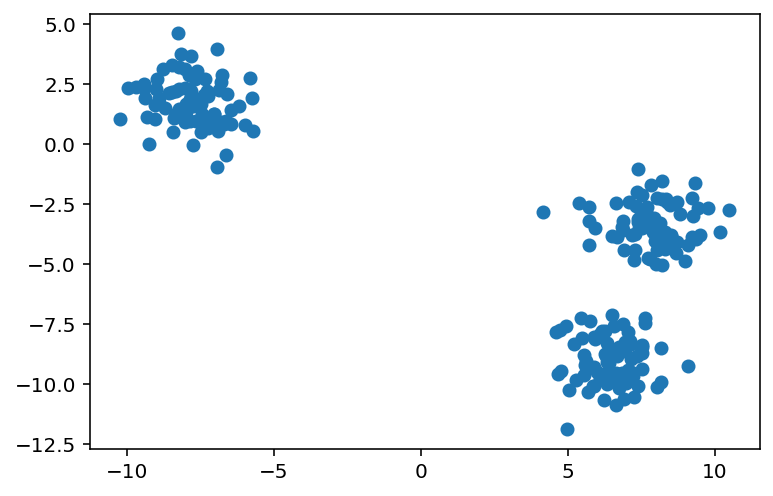

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Xd[:,0],Xd[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(Xd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label=KMclust.predict(Xd) # predict ว่าอยู่ในกลุ่มไหน

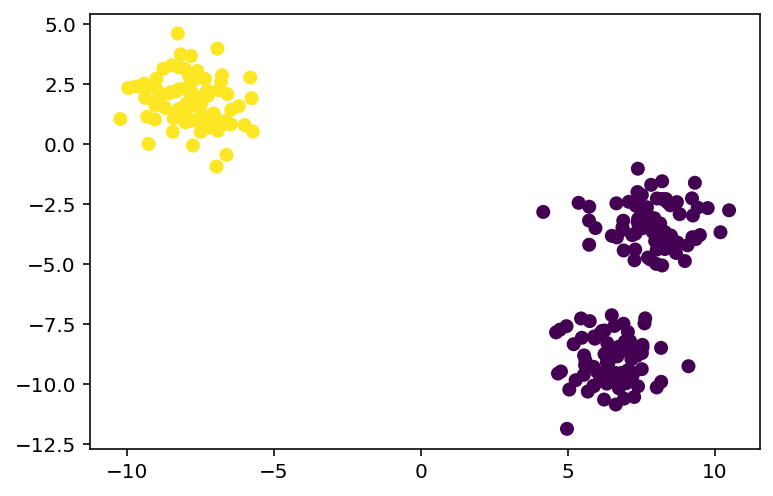

In [ ]:
plt.scatter(Xd[:,0], Xd[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
KMclust.cluster_centers_

array([[ 7.17049205, -6.18852947],
       [-7.79775007,  1.78610777]])

In [ ]:
KMclust.transform(Xd) # the distance between each point and centroid

array([[ 4.35657384, 19.46286796],
       [ 2.71215952, 17.25282908],
       [ 2.70884496, 16.22743323],
       [ 5.05983897, 17.45766143],
       [ 2.02897205, 16.04954075],
       [ 2.56177615, 16.71518607],
       [15.64664579,  1.34745187],
       [ 3.4711508 , 18.87195087],
       [16.62190693,  1.50652845],
       [ 2.7266152 , 17.23167107],
       [16.6160869 ,  0.34904234],
       [ 4.03944671, 16.52353791],
       [ 3.85827321, 14.22449676],
       [17.02789616,  0.19453677],
       [ 3.61896268, 18.53323763],
       [17.58481661,  0.66590015],
       [ 2.30713982, 17.77093305],
       [17.02693124,  1.03696265],
       [17.19176311,  0.52754238],
       [15.33005926,  1.64582881],
       [15.60783922,  1.39409006],
       [ 2.91852292, 16.48022043],
       [ 3.12708999, 18.0930437 ],
       [ 2.26100905, 17.36691817],
       [15.76940085,  2.22813124],
       [ 2.44106119, 17.36937133],
       [ 4.77217036, 18.84251956],
       [ 3.43700643, 18.43292038],
       [ 2.62046403,

In [ ]:
KMclust.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [ ]:
ssdd=[] #ssdd เซ็ทว่างของการหย่า
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(Xd)
    ssdd.append([k, m.inertia_])
ssdd

[[2, 1751.9669425508212],
 [3, 444.034965979045],
 [4, 380.2639248784881],
 [5, 327.11249208354513],
 [6, 274.29964595410934],
 [7, 241.31744098938728],
 [8, 209.5551275068797],
 [9, 186.63082939585428]]

In [ ]:
xyd=np.array(ssdd) #ssdd เซ็ทว่างของการหย่า
print(xyd) #xyd ตัวแปรของ xy ของการหย่า

[[   2.         1751.96694255]
 [   3.          444.03496598]
 [   4.          380.26392488]
 [   5.          327.11249208]
 [   6.          274.29964595]
 [   7.          241.31744099]
 [   8.          209.55512751]
 [   9.          186.6308294 ]]


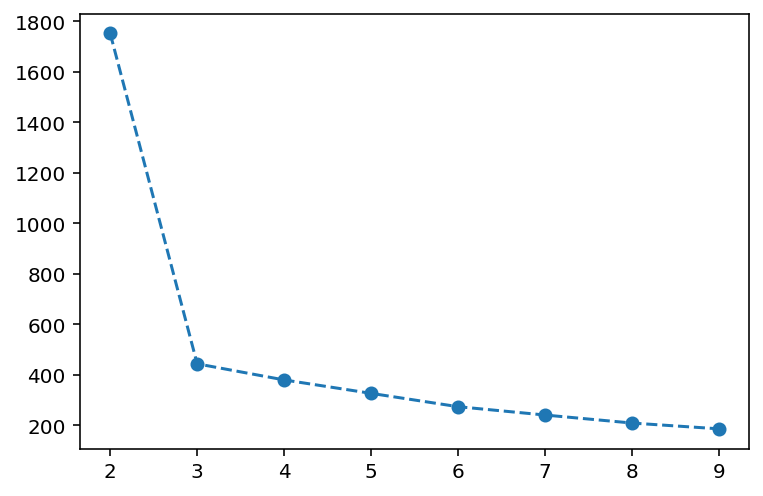

In [ ]:
plt.plot(xyd[:, 0], xyd[:, 1], linestyle='--', marker='o') #xyd ตัวแปรของ xy ของการหย่า
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [ ]:
ddd=pd.DataFrame(ssdd, columns=['k', 'ssdd']) #ddd ตัวแปรของการหย่า
ddd

,k,ssd
0,2,1751.966943
1,3,444.034966
2,4,380.263925
3,5,327.112492
4,6,274.299646
5,7,241.317441
6,8,209.555128
7,9,186.630829


In [ ]:
ddd['pct_chg']=dd['ssdd'].pct_change() * 100
ddd

,k,ssd,pct_chg
0,2,1751.966943,NaN
1,3,444.034966,-74.655060
2,4,380.263925,-14.361716
3,5,327.112492,-13.977511
4,6,274.299646,-16.145163
5,7,241.317441,-12.024151
6,8,209.555128,-13.162046
7,9,186.630829,-10.939507


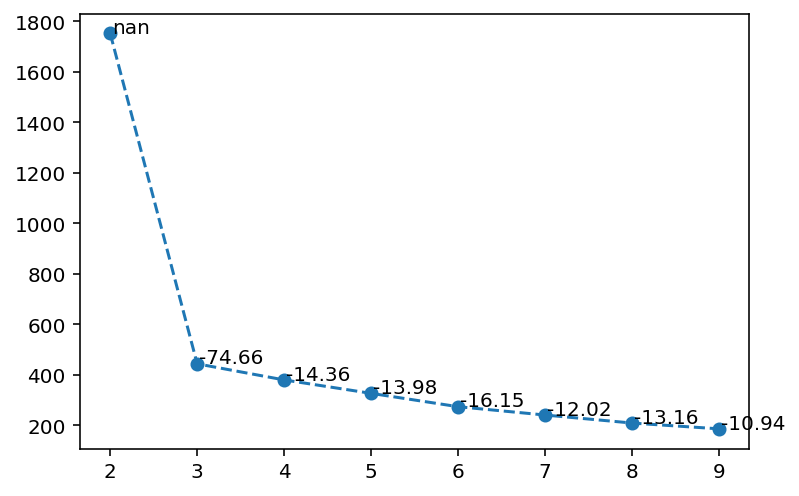

In [ ]:
plt.plot(ddd['k'], ddd['ssdd'], linestyle='--', marker='o')
# plt.plot(xyd[:, 0], xyd[:, 1], '--o')
for index, row in ddd.iterrows():
    plt.text(row['k']+.02, row['ssdd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

In [ ]:
divorce_1['cluster']=KMclust.labels_
divorce_1.head()

,จังหวัด,avg_debt,cluster
0,กรุงเทพมหานคร 53,207665.0,0
1,สมุทรปราการ 53,117360.8,0
2,นนทบุรี 53,240769.0,0
3,ปทุมธานี 53,220761.2,0
4,พระนครศรีอยุธยา 53,163424.5,0


In [ ]:
divorce_1.groupby('cluster').describe().T

cluster                     0              1
avg_debt count     153.000000      76.000000
         mean   133564.730719  129766.527632
         std     55313.462597   57431.318646
         min      9244.000000   18901.500000
         25%     97710.800000   91925.250000
         50%    125291.200000  126322.500000
         75%    167984.700000  159776.125000
         max    309493.700000  386957.400000

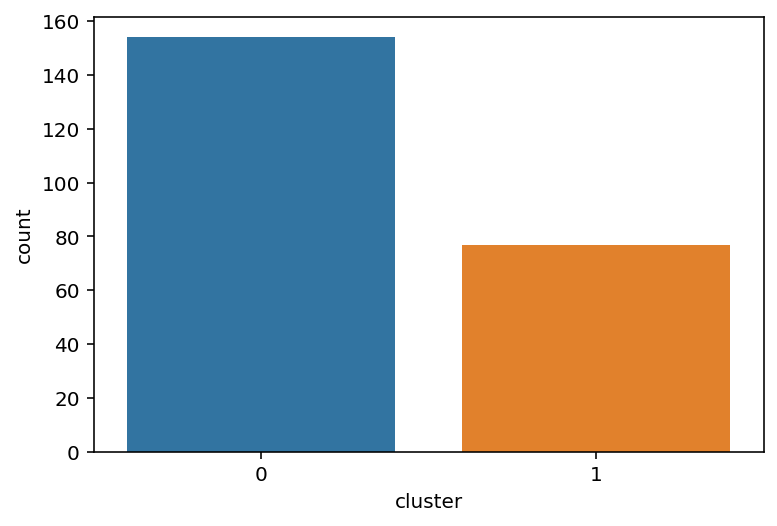

In [ ]:
sns.countplot(x='cluster', data=divorce_1)

In [ ]:
divorce_1

,จังหวัด,avg_debt,cluster
0,กรุงเทพมหานคร 53,207665.0,0
1,สมุทรปราการ 53,117360.8,0
2,นนทบุรี 53,240769.0,0
3,ปทุมธานี 53,220761.2,0
4,พระนครศรีอยุธยา 53,163424.5,0
...,...,...,...
226,ตรัง 55,160207.0,1
227,พัทลุง 55,162248.7,0
228,ปัตตานี 55,109102.5,1
229,ยะลา 55,35828.9,1


In [ ]:
divorce_1.groupby('cluster').head().sort_values('cluster')

,จังหวัด,avg_debt,cluster
0,กรุงเทพมหานคร 53,207665.0,0
1,สมุทรปราการ 53,117360.8,0
2,นนทบุรี 53,240769.0,0
3,ปทุมธานี 53,220761.2,0
4,พระนครศรีอยุธยา 53,163424.5,0
6,ลพบุรี 53,176483.2,1
8,ชัยนาท 53,146131.5,1
10,ชลบุรี 53,191149.0,1
13,ตราด 53,99210.0,1
15,ปราจีนบุรี 53,175678.6,1
